In [2]:
# Loading package
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
# Import dataset
url <- "https://raw.githubusercontent.com/SurajDatta/DSCI100_group_project/main/data/WineQT.csv"
wine_data <- read_csv(url)
colnames(wine_data) <- make.names(colnames(wine_data))

wine_data_clean <- wine_data %>%
     select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid) %>%
     mutate(quality = as_factor(quality))
head(wine_data_clean)
nrow(wine_data_clean)


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00


[1] 1143

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



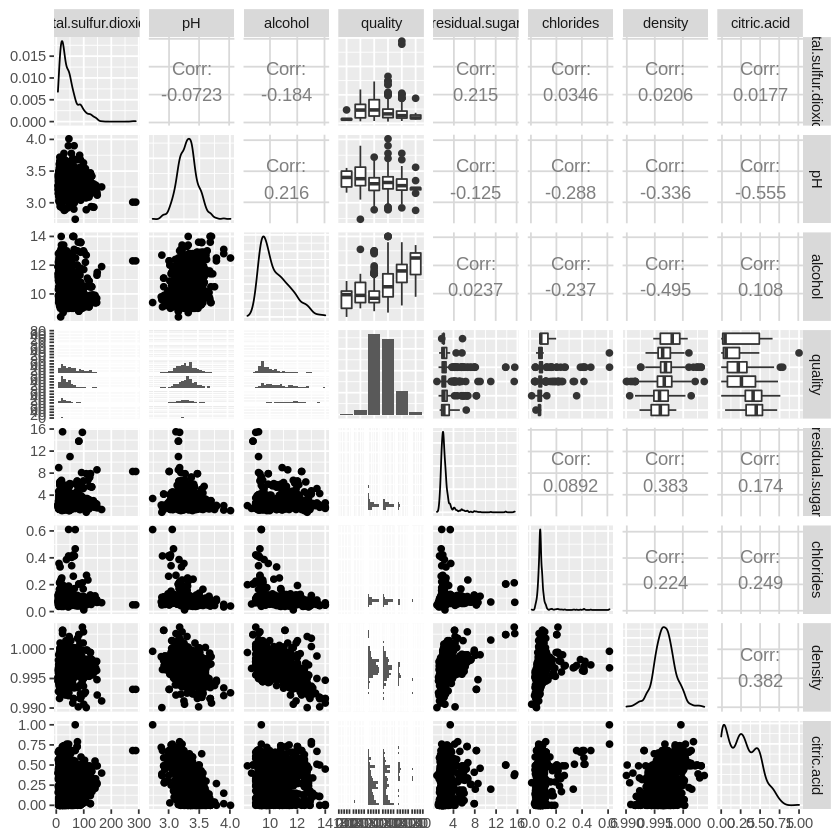

In [4]:
# data split
wine_split <- initial_split(wine_data_clean, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_ggpairs <- wine_train %>%
   ggpairs
wine_ggpairs

In [5]:
wine_subset <- wine_train %>%
  select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid)

names <- colnames(wine_subset %>% select(-quality))

wine_subset

total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00
59,3.30,9.4,5,1.6,0.069,0.9964,0.06
21,3.39,10.0,7,1.2,0.065,0.9946,0.00
65,3.28,9.2,5,1.8,0.097,0.9959,0.08


In [7]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
wine_vfold <- vfold_cv(wine_subset, v = 5, strata = quality)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("quality", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        wine_recipe <- recipe(as.formula(model_string), 
                                data = wine_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(wine_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = wine_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold5: internal: No observations were detected in `t

size,model_string,accuracy
<int>,<chr>,<dbl>
1,quality ~ alcohol,0.5569509
2,quality ~ alcohol+citric.acid,0.5745908
3,quality ~ alcohol+citric.acid+chlorides,0.5781539
4,quality ~ alcohol+citric.acid+chlorides+total.sulfur.dioxide,0.5829273
5,quality ~ alcohol+citric.acid+chlorides+total.sulfur.dioxide+density,0.5794115
6,quality ~ alcohol+citric.acid+chlorides+total.sulfur.dioxide+density+residual.sugar,0.5794454
7,quality ~ alcohol+citric.acid+chlorides+total.sulfur.dioxide+density+residual.sugar+pH,0.5875035


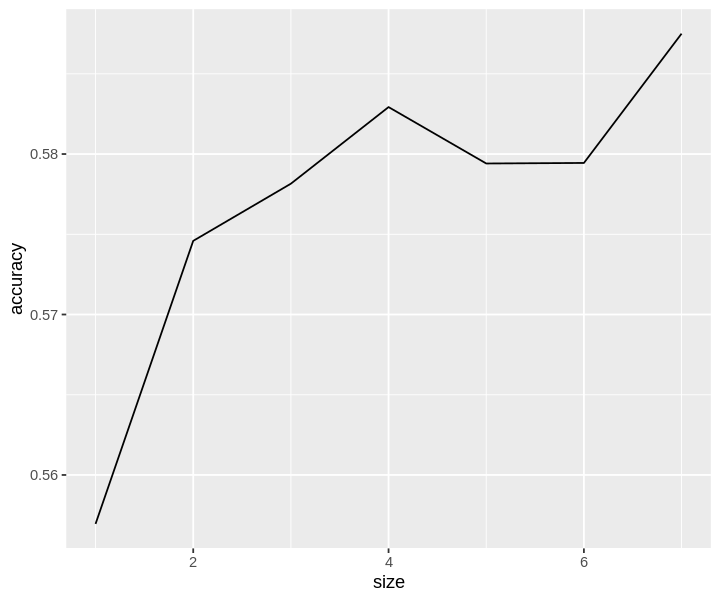

In [8]:
accuracy_plot <- accuracies %>%
ggplot(aes(x = size, y = accuracy))+
geom_line()

accuracy_plot

! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5638550,5,0.024015533,Model01
1,roc_auc,hand_till,0.5800725,5,0.009275697,Model01
3,accuracy,multiclass,0.5255825,5,0.007751896,Model02
3,roc_auc,hand_till,0.6016583,5,0.012711194,Model02
4,accuracy,multiclass,0.5232979,5,0.006245707,Model03
4,roc_auc,hand_till,0.6220666,5,0.019725742,Model03
6,accuracy,multiclass,0.5443783,5,0.009149191,Model04
6,roc_auc,hand_till,0.6164999,5,0.020107555,Model04
8,accuracy,multiclass,0.5432763,5,0.016842918,Model05


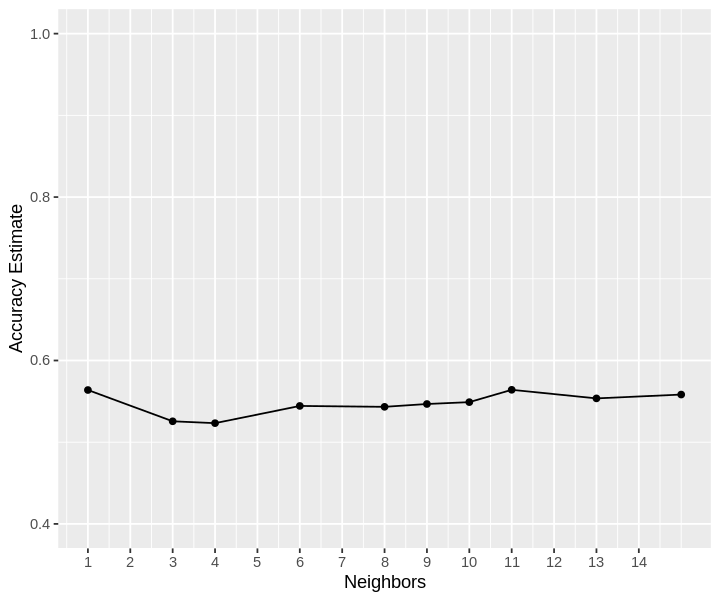

In [6]:
set.seed(9999) 

options(repr.plot.height = 5, repr.plot.width = 6)

wine_train_recipe <- recipe(quality ~. , data = wine_train)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")

wine_vfold <- vfold_cv(wine_subset, v = 5, strata = quality)

knn_results <- workflow() %>%
      add_recipe(wine_train_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = wine_vfold, grid = 10) %>%
      collect_metrics()

knn_results

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

cross_val_plot

In [7]:
accuracies_highest <- accuracies %>%filter(.metric == "accuracy") %>%
         arrange(desc(mean)) %>%
         slice(1)

accuracies_highest

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,multiclass,0.5641123,5,0.01128641,Model08


In [14]:
# Set the seed. Don't remove this!
set.seed(9999) 

wine_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
      set_engine("kknn") %>%
      set_mode("classification")

wine_fit <- workflow() %>%
      add_recipe(wine_train_recipe) %>%
      add_model(wine_knn_spec) %>%
      fit(data = wine_train)

#wine_fit

wine_predictions <- predict(wine_fit, wine_test) %>%
bind_cols(wine_test)

wine_predictions

wine_metrics <- wine_predictions %>%
metrics(truth = quality, estimate = .pred_class)

wine_metrics

wine_conf_mat <- wine_predictions %>%
    conf_mat(truth = quality, estimate = .pred_class)

wine_conf_mat

.pred_class,total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
6,18,3.36,9.5,7,2.00,0.073,0.9968,0.02
5,67,3.17,9.4,5,2.30,0.084,0.9968,0.11
5,40,3.43,9.7,6,2.40,0.085,0.9968,0.14
5,35,3.47,9.4,5,1.90,0.080,0.9972,0.00
5,18,3.40,9.6,6,5.50,0.086,0.9986,0.00
5,114,3.25,9.2,5,2.20,0.114,0.9970,0.43
5,23,3.15,9.2,5,1.70,0.074,0.9971,0.26
5,15,3.40,9.4,6,2.20,0.069,0.9956,0.04
5,73,3.17,10.2,6,2.80,0.110,0.9955,0.15


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5614035
kap,multiclass,0.2954613


          Truth
Prediction  3  4  5  6  7  8
         3  0  0  0  0  0  0
         4  0  0  0  0  0  0
         5  1  2 82 41  2  0
         6  0  8 29 65 21  4
         7  0  1  5 10 13  1
         8  0  0  0  0  0  0